# Tensorflow and keras


In [2]:
# try to make some data
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data examination and processing

In [8]:
X_train.shape # 800, 10
# X_train.shape[1]

(800, 10)

In [9]:
X_train[0:5]

array([[-0.06392624, -0.22104246,  0.18965365,  0.0693698 ,  0.56484236,
         1.63579781, -0.6718682 ,  2.39210964,  0.87489457,  0.19259692],
       [-1.88464871,  0.09205514, -1.61923889,  0.47624035,  2.44122172,
         0.43712678,  2.21441152, -0.993593  ,  2.23427922,  2.52992775],
       [ 0.53130739,  0.26536235,  0.37171417, -0.58275866,  0.39046485,
        -0.10322175, -0.36536815, -0.13427916, -0.90684461, -2.43881716],
       [ 0.29266754, -0.70755229,  0.23037639, -0.5387903 , -1.24448645,
         0.44982721, -0.27950811, -1.12565497, -0.41582218, -0.72021202],
       [-0.10194409, -0.22159969,  0.25012605, -1.44098163, -0.34677158,
        -0.58579272, -0.91165197,  1.12768629,  1.2242701 ,  0.95881631]])

In [14]:
print(X_train.mean(axis = 0)) # mean 0
print(X_train.var(axis = 0)) # sd close to 1 enough

[ 0.04431747 -0.01539305  0.0367727  -0.02558888 -0.05518337  0.05511427
 -0.04809022 -0.09955313 -0.0567985   0.00959328]
[0.74517868 1.00404098 0.67668888 1.01855785 1.09686831 0.9877635
 1.98498547 1.08889058 1.73624132 0.9509341 ]


In [16]:
# if standardise?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train) # subtract mean, divide by sd
print(X_trains.mean(axis = 0))
print(X_trains.var(axis = 0))

[ 2.99760217e-17  1.20042865e-17  1.66533454e-18  1.91990521e-17
  1.47104551e-17 -1.59594560e-18 -5.16253706e-17 -7.45237205e-17
 -6.10622664e-17 -1.41553436e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<Axes: >

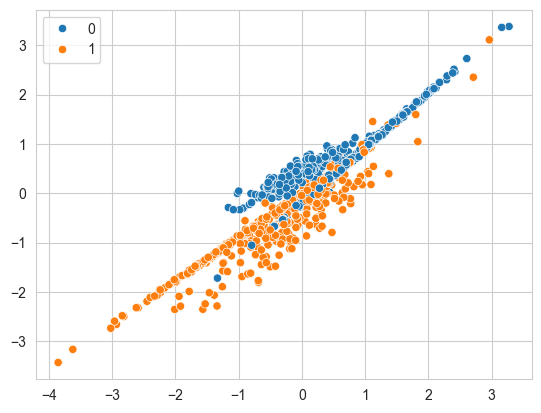

In [22]:
# are the two classes different enough?
# y_train[0:5]
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = X_trains[:,0], y = X_trains[:,2], hue = y_train)

## Model 1: LR

In [3]:
# Train model
model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=200)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.83


## Model 2: MLP from sklearn

In [4]:
# mlp
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.87


## Model 3: Tensorflow



In [5]:
# tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a deep neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # this is the number of features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", acc)

Epoch 1/20


/Users/chizhang/.pyenv/versions/mypydev312/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.5067 - loss: 0.6983
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.8434 - loss: 0.5138
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8721 - loss: 0.4108
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8775 - loss: 0.3313
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8787 - loss: 0.3324
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8777 - loss: 0.3118
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8739 - loss: 0.3211
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8850 - loss: 0.2830
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8876 - loss: 0.2809
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8755 - loss: 0.3126
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8641 - loss: 0.2899
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy